# DATA

In [208]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [209]:
#from imblearn.over.sampling import SMOTE

## load data & dropna

In [210]:
# Read salary data
file_path = Path("Resources/Stroke_dataset.csv")
df_stroke = pd.read_csv(file_path)

# Display sample data
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [211]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [212]:
df_stroke["bmi"].isnull

<bound method Series.isnull of 0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64>

In [213]:
df_stroke_cleaned = df_stroke.dropna(subset=['bmi'])
df_stroke_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


## preprocess categorical data

In [214]:
X = df_stroke_cleaned.drop(columns=['stroke'], inplace=False)
y = df_stroke_cleaned['stroke']

In [215]:
X = pd.get_dummies(X)
X.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
2,31112,80.0,0,1,105.92,32.5,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,1665,79.0,1,0,174.12,24.0,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
5,56669,81.0,0,0,186.21,29.0,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False


In [216]:
#SMOTE
#smote = SMOTE(random_state=1)
#X_resampled, y_resampled = smote.fit_resample(X, y)

## train test split via sklearn

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

In [218]:
X_train.shape

(3681, 22)

In [219]:
X_test.shape

(1228, 22)

In [220]:
# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# MODELS

In [221]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Decsion Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import seaborn as sns
# DNN
import tensorflow as tf
import keras_tuner as kt

from sklearn.metrics import confusion_matrix,classification_report, r2_score, accuracy_score


## logistic regression

In [222]:
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [223]:
# Train the data
classifier.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [224]:
# Score the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9570768812822602
Testing Data Score: 0.9576547231270358


In [225]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
3320,0,0
1768,0,0
1532,0,0
1005,0,0
1279,0,0
...,...,...
1668,0,0
2417,0,0
2799,0,0
4449,0,0


In [226]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.9576547231270358

In [227]:
# Print confusion matrix
log_cm = confusion_matrix(predictions, y_test)

log_cm_df = pd.DataFrame(log_cm, index=["Actual 0", "Actual 1"], columns = ["Predicted 0", "Predicted 1"])

log_cm_df

,Predicted 0,Predicted 1
Actual 0,1176,52
Actual 1,0,0


In [228]:
# Print classification report
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1228
           1       0.00      0.00      0.00         0

    accuracy                           0.96      1228
   macro avg       0.50      0.48      0.49      1228
weighted avg       1.00      0.96      0.98      1228



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## knn

In [229]:
# Instantiate the model with k = 3 neighbors
model = KNeighborsClassifier(n_neighbors=3)

In [230]:
# Train the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [231]:
# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [232]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[1164,   49],
       [  12,    3]])

In [233]:
# Print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1213
           1       0.06      0.20      0.09        15

    accuracy                           0.95      1228
   macro avg       0.52      0.58      0.53      1228
weighted avg       0.98      0.95      0.96      1228



## decision tree

In [234]:
# Step 6: Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)  # Limit depth to avoid overfitting
clf.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)

# Display the classification report
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1176
           1       0.00      0.00      0.00        52

    accuracy                           0.95      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.95      0.93      1228



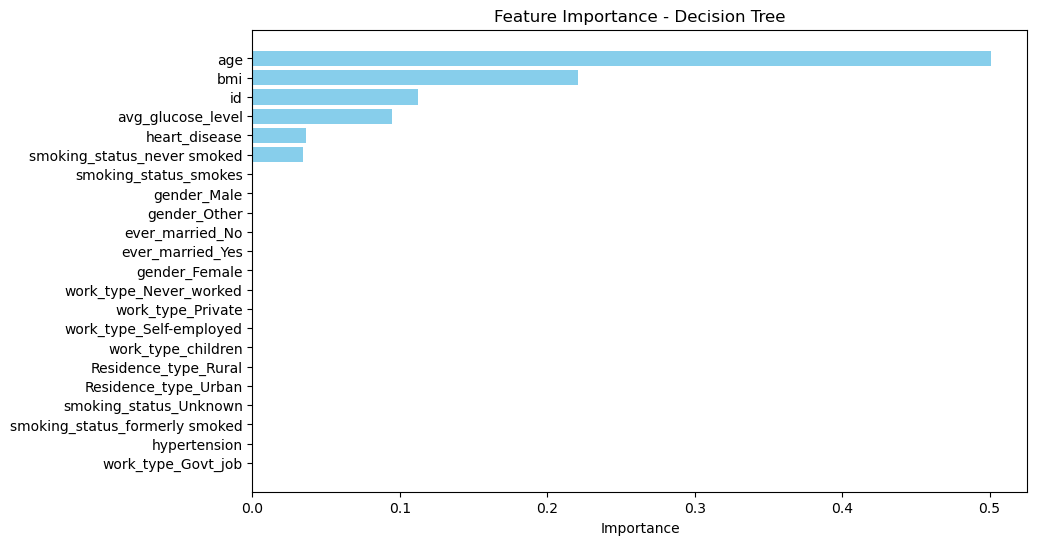

In [235]:
# Extract feature importance from the Decision Tree
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()  
plt.show()

## random forest

In [236]:
# Step 6: Train a Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=100,    # Number of trees
    max_depth=10,        # Maximum depth of each tree
    random_state=42,
    class_weight="balanced"  # Address class imbalance
)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [237]:
# Step 7: Evaluate the model
y_pred = rf_clf.predict(X_test)
report = classification_report(y_test, y_pred)

# Display the classification report
print(report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1176
           1       0.15      0.12      0.13        52

    accuracy                           0.93      1228
   macro avg       0.56      0.54      0.55      1228
weighted avg       0.93      0.93      0.93      1228



In [238]:
# Extract feature importance from the Random Forest model
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_clf.feature_importances_
})

# Sort the features by importance in descending order
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

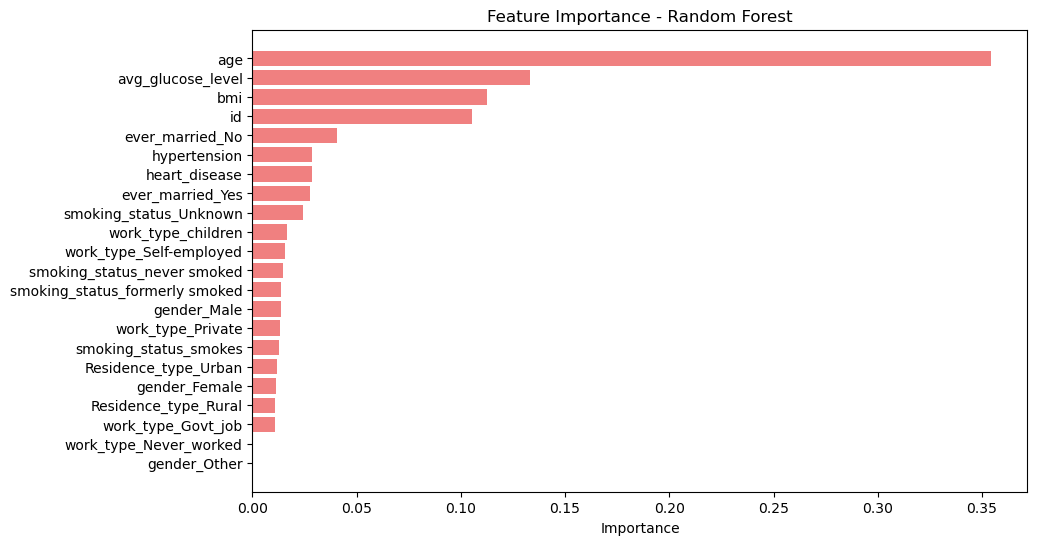

In [239]:
# Plot the feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

## naive bayes

In [240]:
# 3. Build the Naive Bayes Model
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

In [241]:
# 4. Evaluate the Model
y_pred = model.predict(X_test_scaled)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# R-squared score 
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 16.61%
R-squared: -19.56
Confusion Matrix:
[[ 153 1023]
 [   1   51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.13      0.23      1176
           1       0.05      0.98      0.09        52

    accuracy                           0.17      1228
   macro avg       0.52      0.56      0.16      1228
weighted avg       0.95      0.17      0.22      1228



In [242]:
# 5. Model Optimization - Hyperparameter Tuning

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Retrain the model with best parameters
optimized_model = GaussianNB(var_smoothing=best_params['var_smoothing'])
optimized_model.fit(X_train_scaled, y_train)

# Evaluate the optimized model
y_pred_optimized = optimized_model.predict(X_test_scaled)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Accuracy: {optimized_accuracy * 100:.2f}%")

# Final R-squared score for optimized model
optimized_r2 = r2_score(y_test, y_pred_optimized)
print(f"Optimized R-squared: {optimized_r2:.2f}")

Best Hyperparameters: {'var_smoothing': 1e-06}
Optimized Accuracy: 18.89%
Optimized R-squared: -19.00


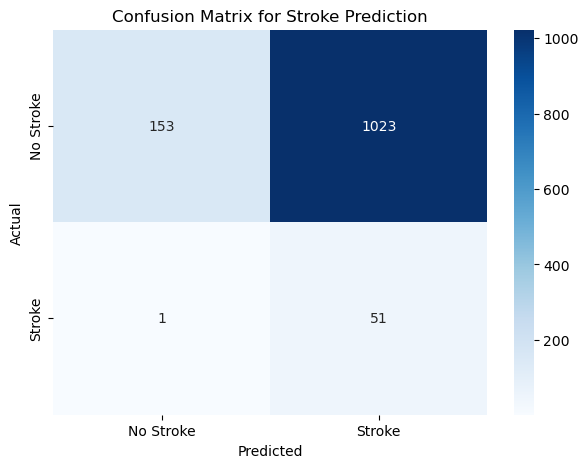

In [243]:
# 6. Model Performance Visualization (Confusion Matrix)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Stroke Prediction')
plt.show()

In [244]:
# 7. Save the results in CSV (for iterative tracking of optimization)
results = {
    'Model': ['Initial', 'Optimized'],
    'Accuracy': [accuracy, optimized_accuracy],
    'R-squared': [r2, optimized_r2],
    'Best var_smoothing': [None, best_params['var_smoothing']]
}
results_df = pd.DataFrame(results)
results_df.to_csv("model_optimization_results.csv", index=False)

In [245]:
# Final model performance output
print("Final Model Performance:")
print(results_df)

Final Model Performance:
       Model  Accuracy  R-squared  Best var_smoothing
0    Initial  0.166124 -19.563056                 NaN
1  Optimized  0.188925 -19.000785            0.000001


## dnn

In [246]:

# Define the model creation function
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation', ['relu', 'tanh', 'sigmoid'])

    # Allow kerastuner to decide number of neurons in the first layer
    nn_model.add(tf.keras.layers.Dense(
        units=hp.Int('first_units', min_value=1, max_value=12, step=2),
        activation=activation,
        input_dim=22
    ))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(
            units=hp.Int('units_' + str(i), min_value=1, max_value=10, step=2),
            activation=activation
        ))

    # Add output layer
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

# Instantiate the tuner
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2,
    directory="my_dir",
    project_name="tune_model"
)

# Run the kerastuner search for best hyperparameters
fit_model=tuner.search(X_train_scaled, y_train, epochs=20, validation_data=(X_test_scaled, y_test))

# Display the search results
tuner.results_summary()

Reloading Tuner from my_dir/tune_model/tuner0.json
Results summary
Results in my_dir/tune_model
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0016 summary
Hyperparameters:
activation: tanh
first_units: 9
num_layers: 2
units_0: 9
units_1: 3
units_2: 7
units_3: 3
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
units_4: 9
units_5: 1
Score: 0.9592834115028381

Trial 0056 summary
Hyperparameters:
activation: tanh
first_units: 11
num_layers: 5
units_0: 7
units_1: 1
units_2: 7
units_3: 7
units_4: 5
units_5: 3
tuner/epochs: 20
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.9592834115028381

Trial 0046 summary
Hyperparameters:
activation: tanh
first_units: 9
num_layers: 3
units_0: 1
units_1: 5
units_2: 3
units_3: 3
units_4: 1
units_5: 5
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0045
Score: 0.9592834115028381

Trial 0002 summary
Hyperparameters:
activation: 

In [247]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 9,
 'num_layers': 2,
 'units_0': 9,
 'units_1': 3,
 'units_2': 7,
 'units_3': 3,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0012',
 'units_4': 9,
 'units_5': 1}

In [248]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

39/39 - 0s - 3ms/step - accuracy: 0.9593 - loss: 0.1540
Loss: 0.1540442705154419, Accuracy: 0.9592834115028381


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [249]:
predictions = best_model.predict(X_test_scaled)

# Convert predictions to binary or class labels (depending on your model output)
# Assuming a binary classification model with a sigmoid activation
predicted_classes = (predictions > 0.5).astype(int)



# Generate a classification report
target_names = ["Class 0", "Class 1"]  # Update with your actual class names
print(classification_report(y_test, predicted_classes, target_names=target_names))

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step
              precision    recall  f1-score   support

     Class 0       0.96      1.00      0.98      1176
     Class 1       1.00      0.04      0.07        52

    accuracy                           0.96      1228
   macro avg       0.98      0.52      0.53      1228
weighted avg       0.96      0.96      0.94      1228



In [250]:
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)  # Ensure `predicted_classes` are processed as per the earlier snippet

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_df)

# Calculate the accuracy score
acc_score = accuracy_score(y_test, predicted_classes)
print(f"Accuracy Score: {acc_score:.2f}")

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0         1176            0
Actual 1           50            2
Accuracy Score: 0.96
